In [1]:
# Step 1: Mount Google Drive to access images
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
# Function to display images
def display_image(image, title='Image'):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
# Replace 'path/to/your/image.jpg' with your actual image path in Google Drive
image_path = '/content/task_11.jpeg'
image = cv2.imread(image_path)



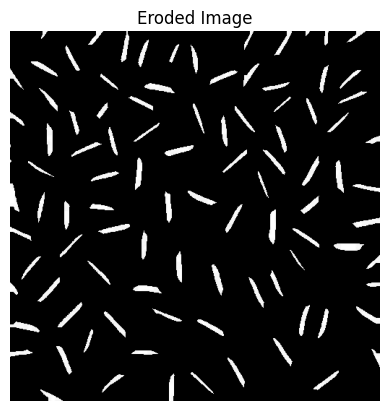

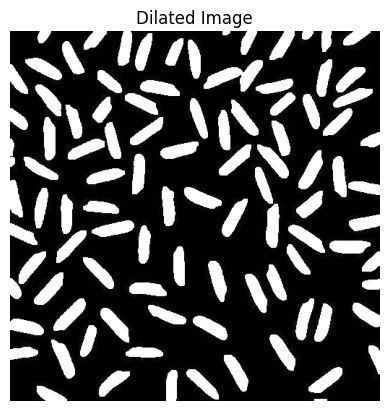

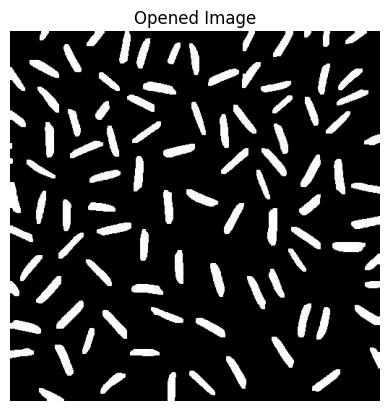

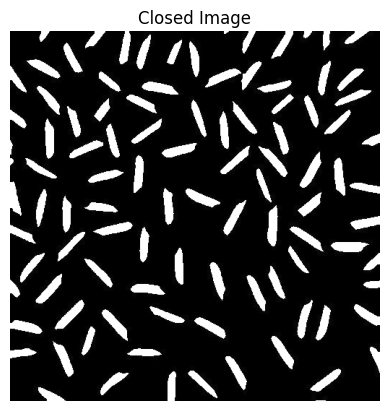

In [3]:
# Task 1: Erosion
kernel = np.ones((5, 5), np.uint8)
eroded = cv2.erode(image, kernel, iterations=1)
display_image(eroded, title='Eroded Image')

# Task 1: Dilation
dilated = cv2.dilate(image, kernel, iterations=1)
display_image(dilated, title='Dilated Image')

# Task 1: Opening (Erosion followed by Dilation)
opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
display_image(opened, title='Opened Image')

# Task 1: Closing (Dilation followed by Erosion)
closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
display_image(closed, title='Closed Image')



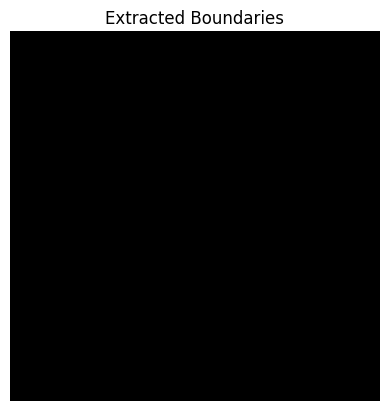

In [4]:
# Task 2: Extract boundaries
boundary = cv2.subtract(image, closed)
display_image(boundary, title='Extracted Boundaries')



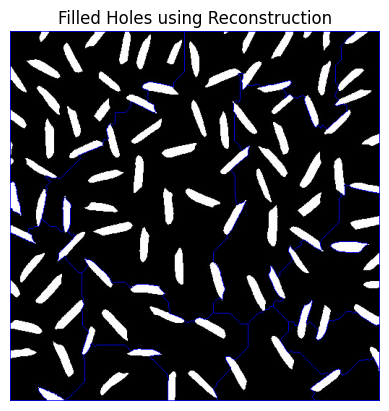

In [6]:
# Task 3: Fill holes using reconstruction
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Thresholding to segment the image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
# Morphological reconstruction
sure_bg = cv2.dilate(thresh, kernel, iterations=3)
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8) # Convert sure_fg to uint8 to match sure_bg
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
_, markers = cv2.connectedComponents(sure_fg)

# Add one all the markers to ensure sure foreground is marked
markers = markers + 1
markers[unknown == 255] = 0

# Perform the watershed algorithm
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Marking boundaries

display_image(image, title='Filled Holes using Reconstruction')

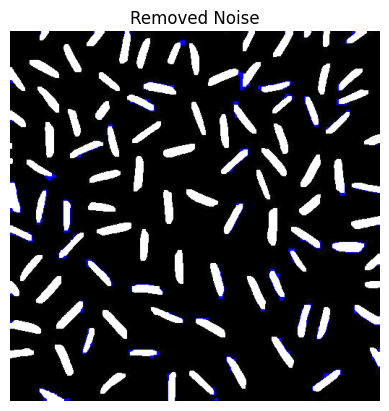

In [7]:
# Task 4: Remove Noise using Morphology
# Apply closing then opening to remove noise
cleaned = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_OPEN, kernel)
display_image(cleaned, title='Removed Noise')



In [8]:
# Task 5: Detect specific shapes (using contours as an example)
gray_cleaned = cv2.cvtColor(cleaned, cv2.COLOR_BGR2GRAY)
contours, _ = cv2.findContours(gray_cleaned, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



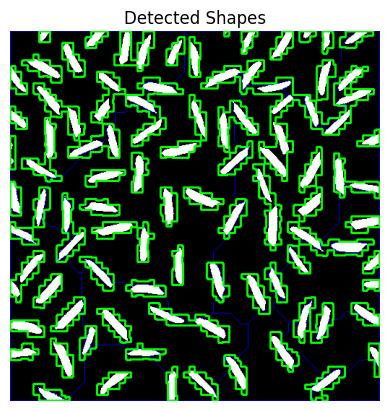

In [9]:
# Draw contours
shape_detected = image.copy()
cv2.drawContours(shape_detected, contours, -1, (0, 255, 0), 2)
display_image(shape_detected, title='Detected Shapes')



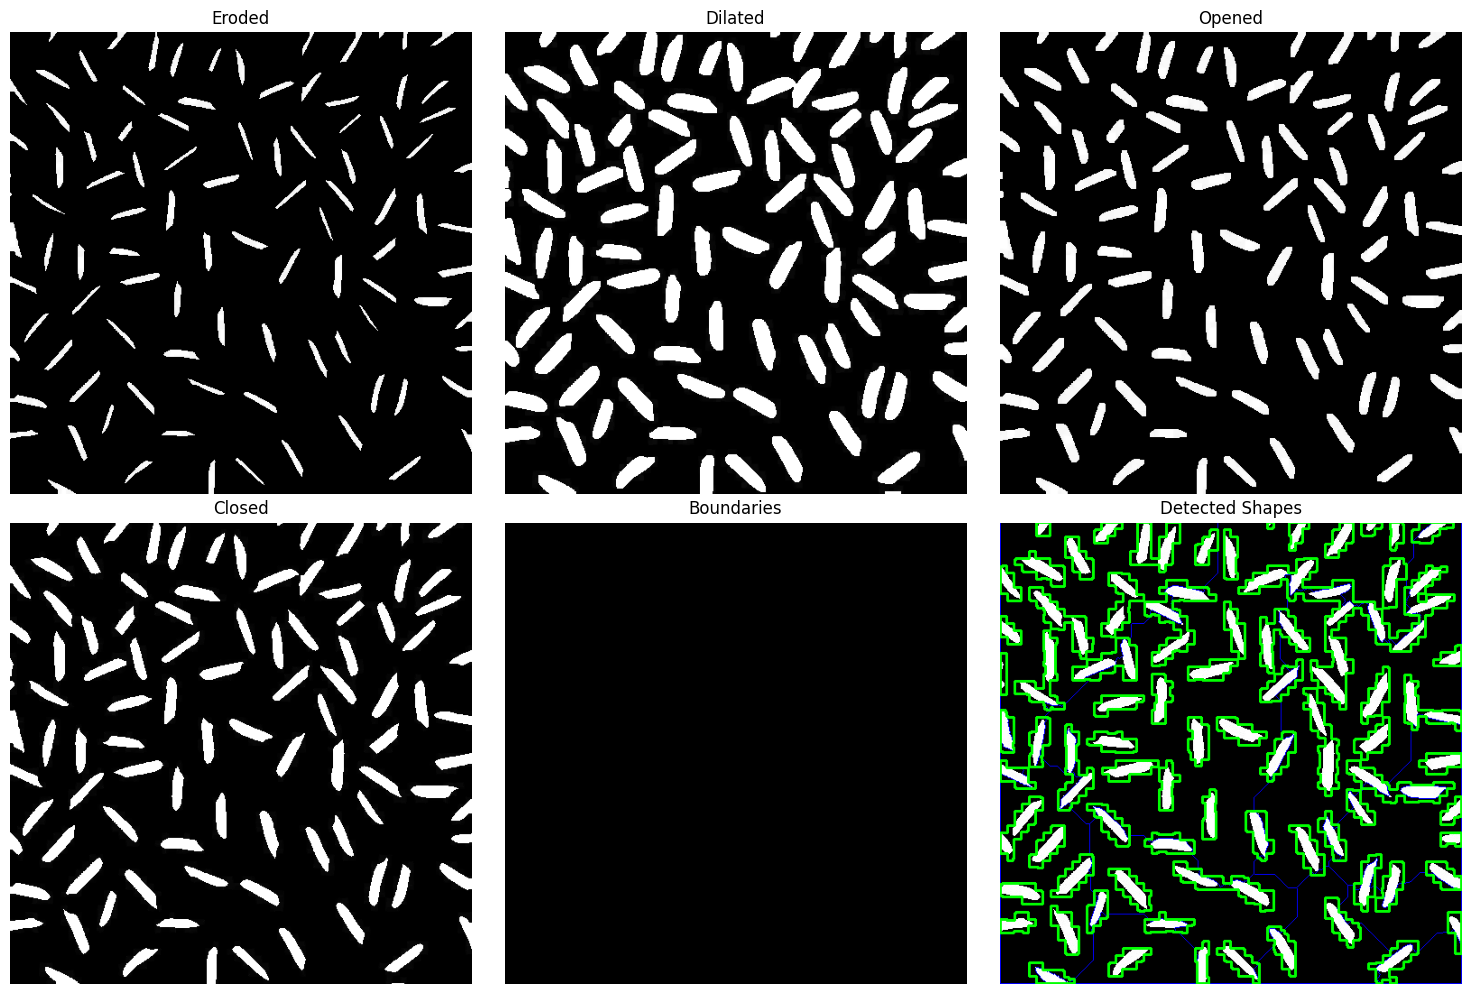

In [10]:
# Final Results Display
final_fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(cv2.cvtColor(eroded, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Eroded')
axs[0, 0].axis('off')

axs[0, 1].imshow(cv2.cvtColor(dilated, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Dilated')
axs[0, 1].axis('off')

axs[0, 2].imshow(cv2.cvtColor(opened, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title('Opened')
axs[0, 2].axis('off')

axs[1, 0].imshow(cv2.cvtColor(closed, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Closed')
axs[1, 0].axis('off')

axs[1, 1].imshow(cv2.cvtColor(boundary, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Boundaries')
axs[1, 1].axis('off')

axs[1, 2].imshow(cv2.cvtColor(shape_detected, cv2.COLOR_BGR2RGB))
axs[1, 2].set_title('Detected Shapes')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

Apply functionalties on other image

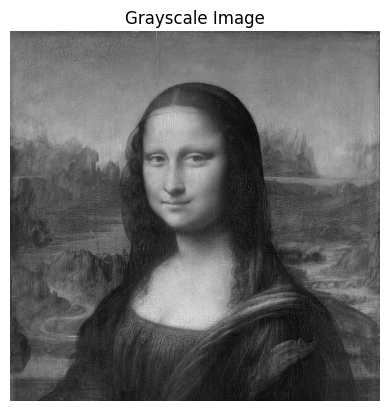

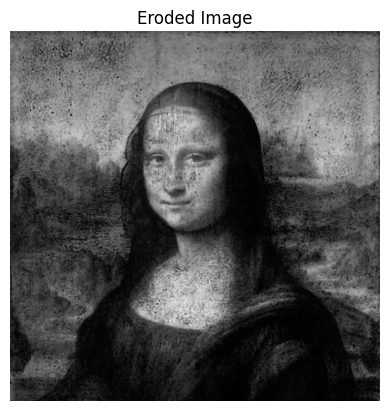

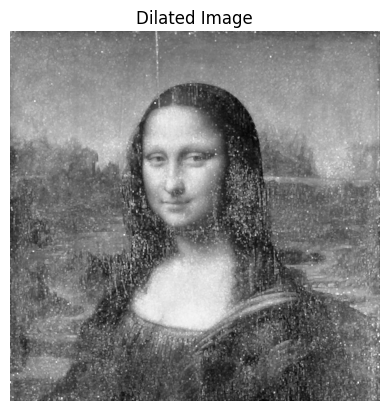

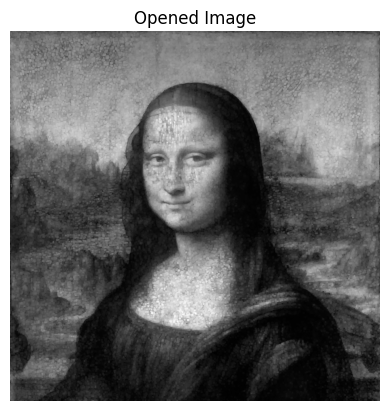

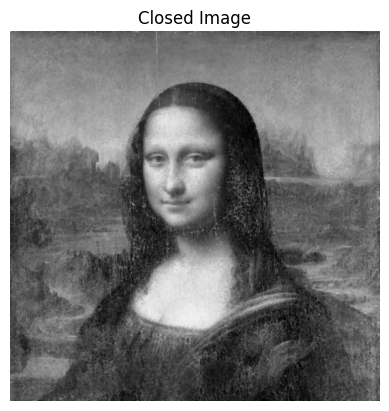

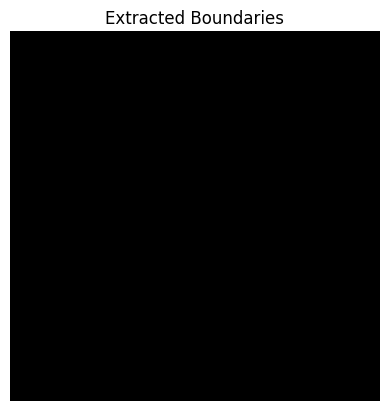

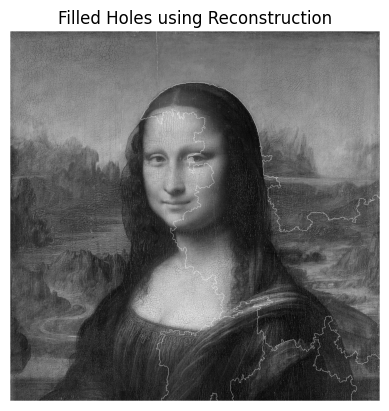

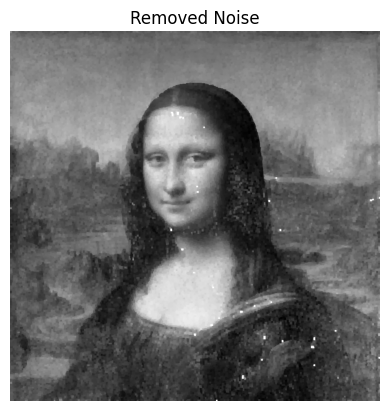

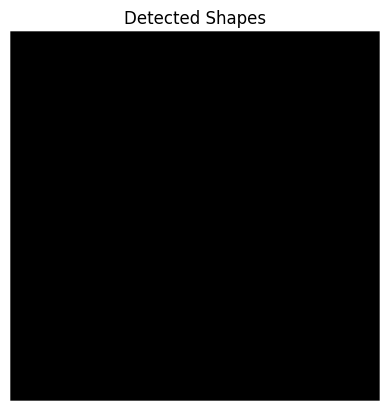

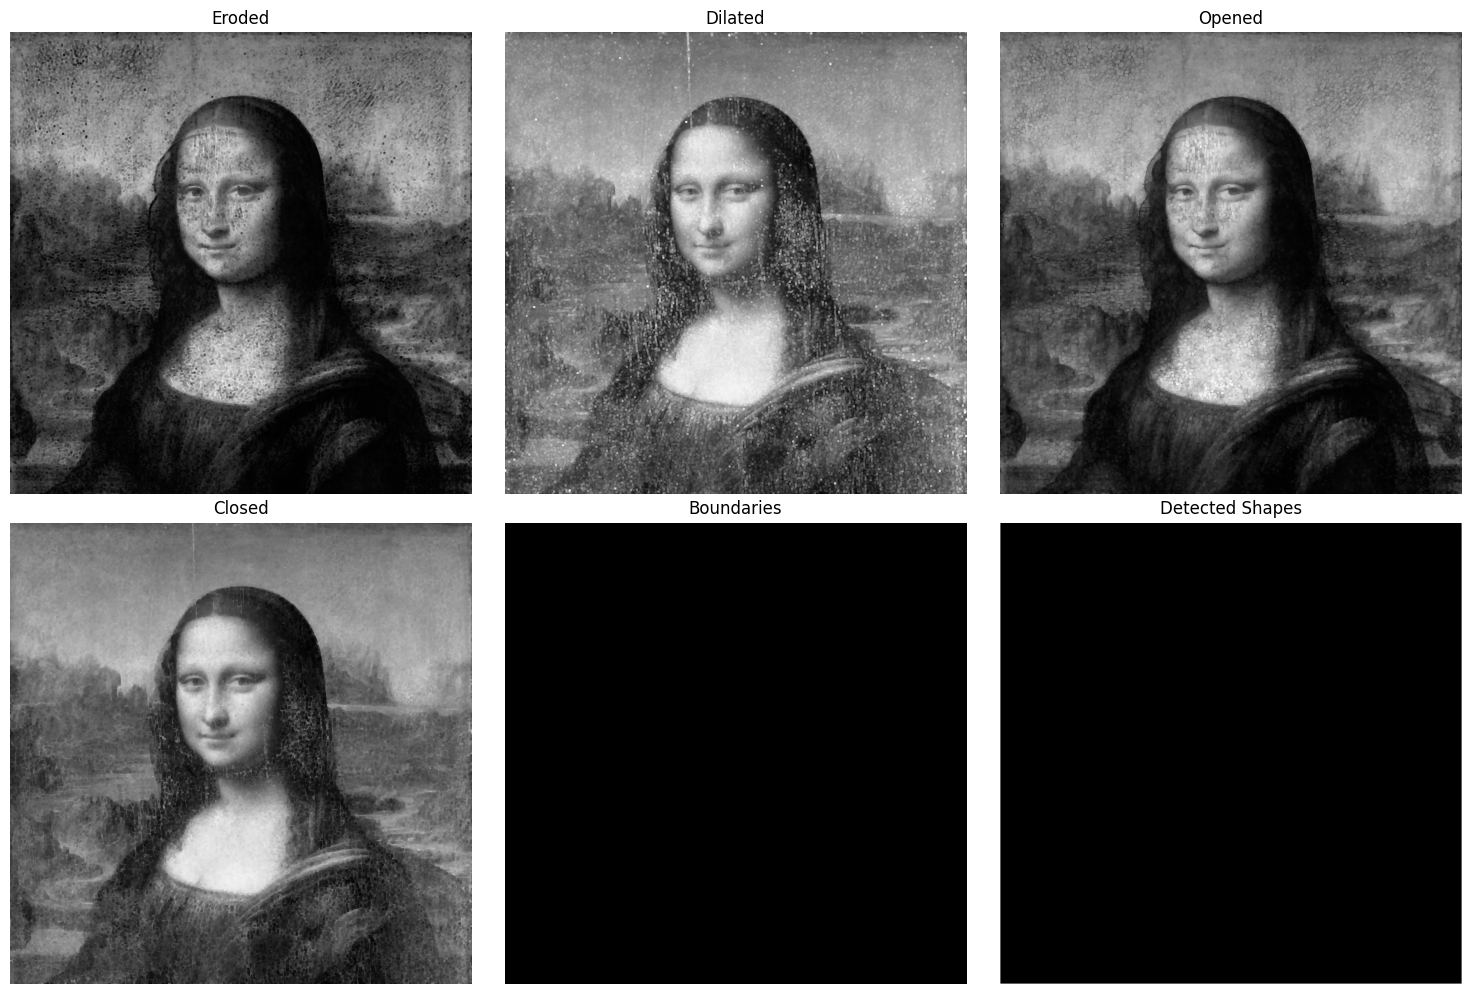

In [12]:
# Function to display images
def display_image(image, title='Image'):
    plt.imshow(image, cmap='gray')  # Use 'gray' for grayscale images
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
# Replace 'path/to/your/image.jpg' with your actual image path in Google Drive
image_path = '/content/monalisa-1200x1200.jpg'
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
display_image(gray_image, title='Grayscale Image')

# Define the kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Task 1: Erosion
eroded = cv2.erode(gray_image, kernel, iterations=1)
display_image(eroded, title='Eroded Image')

# Task 1: Dilation
dilated = cv2.dilate(gray_image, kernel, iterations=1)
display_image(dilated, title='Dilated Image')

# Task 1: Opening (Erosion followed by Dilation)
opened = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)
display_image(opened, title='Opened Image')

# Task 1: Closing (Dilation followed by Erosion)
closed = cv2.morphologyEx(gray_image, cv2.MORPH_CLOSE, kernel)
display_image(closed, title='Closed Image')

# Task 2: Extract boundaries
boundary = cv2.subtract(gray_image, closed)
display_image(boundary, title='Extracted Boundaries')

# Task 3: Fill holes using reconstruction
# Thresholding to segment the image
_, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)
# Morphological reconstruction
sure_bg = cv2.dilate(thresh, kernel, iterations=3)
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8) # Convert sure_fg to uint8
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
_, markers = cv2.connectedComponents(sure_fg)

# Add one all the markers to ensure sure foreground is marked
markers = markers + 1
markers[unknown == 255] = 0

# Perform the watershed algorithm
markers = cv2.watershed(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), markers)
gray_image[markers == -1] = 255  # Marking boundaries (optional)

display_image(gray_image, title='Filled Holes using Reconstruction')

# Task 4: Remove Noise using Morphology
# Apply closing, then opening to remove noise
cleaned = cv2.morphologyEx(gray_image, cv2.MORPH_CLOSE, kernel)
cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_OPEN, kernel)
display_image(cleaned, title='Removed Noise')

# Task 5: Detect specific shapes (using contours as an example)
contours, _ = cv2.findContours(cleaned, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on an empty image
shape_detected = np.zeros_like(cleaned)
cv2.drawContours(shape_detected, contours, -1, 255, 1)  # Draw contours in white

display_image(shape_detected, title='Detected Shapes')

# Final Results Display
final_fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(eroded, cmap='gray')
axs[0, 0].set_title('Eroded')
axs[0, 0].axis('off')

axs[0, 1].imshow(dilated, cmap='gray')
axs[0, 1].set_title('Dilated')
axs[0, 1].axis('off')

axs[0, 2].imshow(opened, cmap='gray')
axs[0, 2].set_title('Opened')
axs[0, 2].axis('off')

axs[1, 0].imshow(closed, cmap='gray')
axs[1, 0].set_title('Closed')
axs[1, 0].axis('off')

axs[1, 1].imshow(boundary, cmap='gray')
axs[1, 1].set_title('Boundaries')
axs[1, 1].axis('off')

axs[1, 2].imshow(shape_detected, cmap='gray')
axs[1, 2].set_title('Detected Shapes')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()